*ref: https://inria.github.io/scikit-learn-mooc/predictive_modeling_pipeline/02_numerical_pipeline_index.html*

In this notebook, we present how to build predictive models on tabular datasets, with only numerical features.

- the scikit-learn API: .fit(X, y)/.predict(X)/.score(X, y);
- how to evaluate the generalization performance of a model with a train-test split.

# Loading the dataset with Pandas

Numerical data is the most natural type of data used in machine learning and can (almost) directly be fed into predictive models. We will load a subset of the original data with only the numerical columns.

In [3]:
import pandas as pd

adult_census = pd.read_csv("../../datasets/adult-census-numeric.csv")

In [3]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


# Separate the data and the target

In [5]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [7]:
data = adult_census.drop(columns=[target_name, ])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


We can now linger on the variables, also denominated features, that we will use to build our predictive model. In addition, we can also check how many samples are available in our dataset.

In [9]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [11]:
print(f"The dataset contains {data.shape[0]} samples and "
      f"{data.shape[1]} features")

The dataset contains 39073 samples and 4 features


# Fit a model and make predictions
We will build a classification model using the “K-nearest neighbors” strategy. To predict the target of a new sample, a k-nearest neighbors takes into account its k closest samples in the training set and predicts the majority target of these samples.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
_ = model.fit(data, target)

**Learning can be represented as follows:**

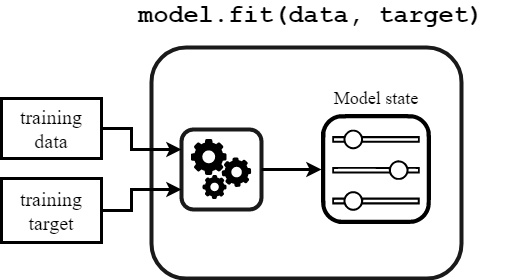

The method fit is composed of two elements: (i) a learning algorithm and (ii) some model states. The learning algorithm takes the training data and training target as input and sets the model states. These model states will be used later to either predict (for classifiers and regressors) or transform data (for transformers).

Let’s use our model to make some predictions using the same dataset.

In [15]:
target_predicted = model.predict(data)

We can illustrate the prediction mechanism as follows:

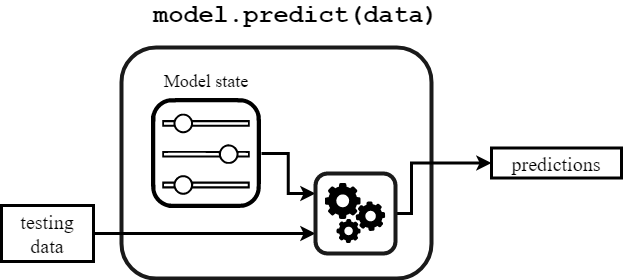

To predict, a model uses a prediction function that will use the input data together with the model states. As for the learning algorithm and the model states, the prediction function is specific for each type of model.

In [20]:
# Let’s now have a look at the computed predictions. 
# For the sake of simplicity, we will look at the five first predicted targets.
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [21]:
# Indeed, we can compare these predictions to the actual data…

target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [22]:
# …and we could even check if the predictions agree with the real targets:

target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [24]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


**To get a better assessment, we can compute the average success rate.**

In [26]:
(target == target_predicted).mean()

0.8238169580016892

This result means that the model makes a correct prediction for approximately 82 samples out of 100. Note that we used the same data to train and evaluate our model. Can this evaluation be trusted or is it too good to be true?

# Train-test data split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized). It is harder to conclude on never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when training the model and using it afterwards for model evaluation. The data used to fit a model is called training data while the data used to assess a model is called testing data.

In [28]:
adult_census_test = pd.read_csv('../datasets/adult-census-numeric-test.csv')

In [35]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name, ])

In [38]:
target_test.head()

0     <=50K
1      >50K
2      >50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [39]:
data_test.head()

,age,capital-gain,capital-loss,hours-per-week
0,20,0,0,35
1,53,0,0,72
2,41,0,0,50
3,20,0,0,40
4,25,0,0,40


In [32]:
# We can check the number of features and samples available in this new set.

print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 9769 samples and 4 features


Instead of computing the prediction and manually computing the average success rate, we can use the method **score.**

In [34]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.807


Let’s check the underlying mechanism when the score method is called:

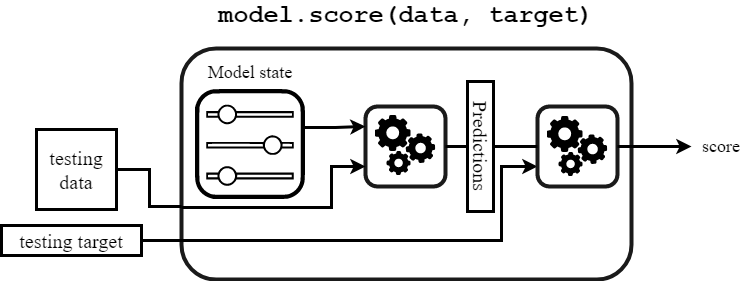

To compute the score, the predictor first computes the predictions (using the predict method) and then uses a scoring function to compare the true target y and the predictions. Finally, the score is returned.